<a href="https://colab.research.google.com/github/machave11/Hotel-Booking-Analysis/blob/main/Nikhil_Machave%7CCopy_of_Hotel_Booking_Analysis_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## <b> Have you ever wondered when the best time of year to book a hotel room is? Or the optimal length of stay in order to get the best daily rate? What if you wanted to predict whether or not a hotel was likely to receive a disproportionately high number of special requests? This hotel booking dataset can help you explore those questions!

## <b>This data set contains booking information for a city hotel and a resort hotel, and includes information such as when the booking was made, length of stay, the number of adults, children, and/or babies, and the number of available parking spaces, among other things. All personally identifying information has been removed from the data. </b>

## <b> Explore and analyze the data to discover important factors that govern the bookings. </b>

In [1]:
#importing important libraries for the EDA.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn as sk
import math
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
df = pd.read_csv('/content/drive/MyDrive/Alma Better/Capstone-Project EDA/Copy of Hotel Bookings.csv')

In [ ]:
df.head()

In [5]:
df.shape

(119390, 32)

In [ ]:
df.tail()

In [ ]:
df.info()

In [ ]:
df.columns

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type', 'agent',
       'company', 'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date'],
      dtype='object')

In [ ]:
# checking the summary of statitics 
df.describe()

Looking Some NaN values or Outliers

In [ ]:
# checking if our data contain some missing order
df.isna().sum().sort_values(ascending=False)

In [11]:
# Dropping comapny column becoz it having too many missing values
df.drop(columns=['company'], axis=1, inplace=True)

In Children column we have 4 missing values, so we are filling those missing values with average value of children column and we are type-casting float values to integer value.

In [17]:
# Replace All missing value with rounded mean value
df['children'].fillna(round(df['children'].mean()), inplace=True)
df['children']= df['children'].apply(lambda x : int(x))

In Agent we have 16340 missing values, so we replacing those value with unknown

In [24]:
df['agent'].fillna(0,inplace=True)
df['agent'] = df['agent'].apply(lambda x : int(x))
df['agent'] = df['agent'].apply(lambda x : 'unknown' if x==0 else x)

In [ ]:
# Dropping the rows where sum of adults, childrens, babies is equals to 0
df = df.drop(df[(df['adults']+df['children']+df['babies'])==0].index) #dropping the rows where the sum of adult,children and babies is 0.

Checking for ouliers in daily avarage rate

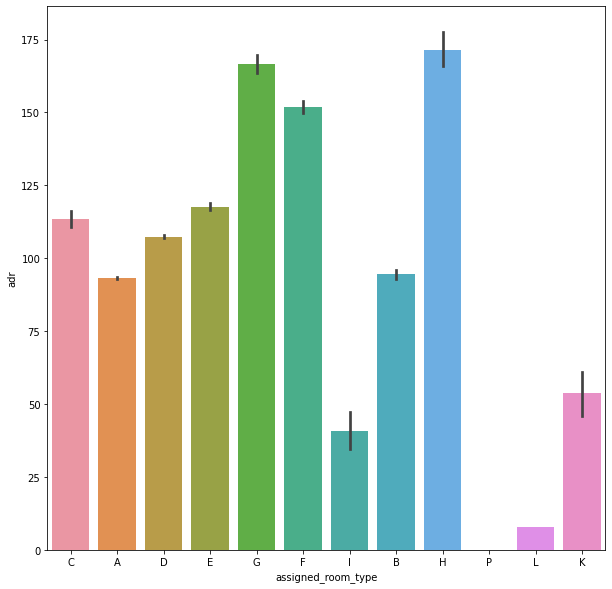

In [29]:
plt.figure(figsize=(10,10))
sns.barplot(y=df['adr'], x=df['assigned_room_type'])

# Removing outliers data from dataset where adr is greater than 1000

In [36]:
#dropping dataset where adr is greater than 1000
df= df.drop(df[df['adr']>1000].index)
# dropping data where adr is leaa than zero
df = df.drop(df[df['adr']<0].index)

Things we have to still now
1. checking the head and tail of dataset
2.checking summary and statistics of dataset
3.checking some NaN values or Outliers
4.filled missing data and Analyse outliers and removed outliers

# Now lets try to finds out solution of below questions:



 1.What is the percentage of booking done in different hotels?
 2.How many total bookings done in different Years?
 3.How many total bookings done in different months?
 4.Total Number of Booking Cancelled in different months?
 5.Total Number of Non-Cancelled Bookings in different months?

# 1.Plot the type of hotel anf there booking

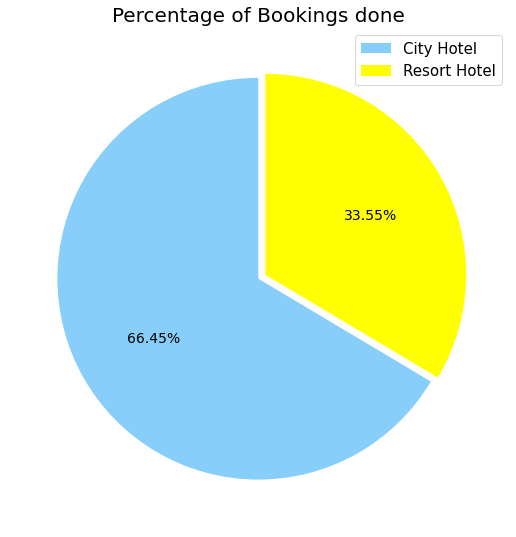

In [51]:
#Pie-Chart for the percentage of bookings done in different types of Hotels.
plt.figure(figsize=(9,10))
labels = df['hotel'].value_counts().index.tolist()
sizes = df['hotel'].value_counts().tolist()
explode = (0, 0.04)
colors = ['lightskyblue','yellow']
plt.pie(sizes, explode=explode, colors=colors,autopct='%1.2f%%', startangle=90, textprops={'fontsize': 14})
plt.title('Percentage of Bookings done', fontsize=20)
plt.legend(labels,loc=1, prop = {'size' : 15})


Conclusion = 66.45% of hotel booking done in City hotel
             33.55% hotel booking done in Resort hotel

# 2.Plot yearwise hotel Booking

Text(0, 0.5, 'Number of Bookings')

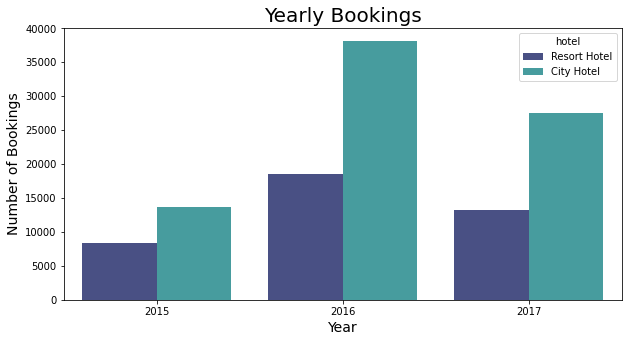

In [60]:
#Countplot for Number of bookings done in 2015, 2016 and 2017 in different type of hotels
plt.figure(figsize=(10,5))
sns.countplot (x= 'arrival_date_year', data= df, hue= 'hotel', palette='mako').set_title ('Yearly Bookings', fontsize = 20)
plt.xlabel('Year', fontsize=14)
plt.ylabel('Number of Bookings', fontsize=14)


Conclusion = We see that, In year 2016 most of the booking have been made in City Hotel and Resort hotel

# Plot of Monthwise hotel booking

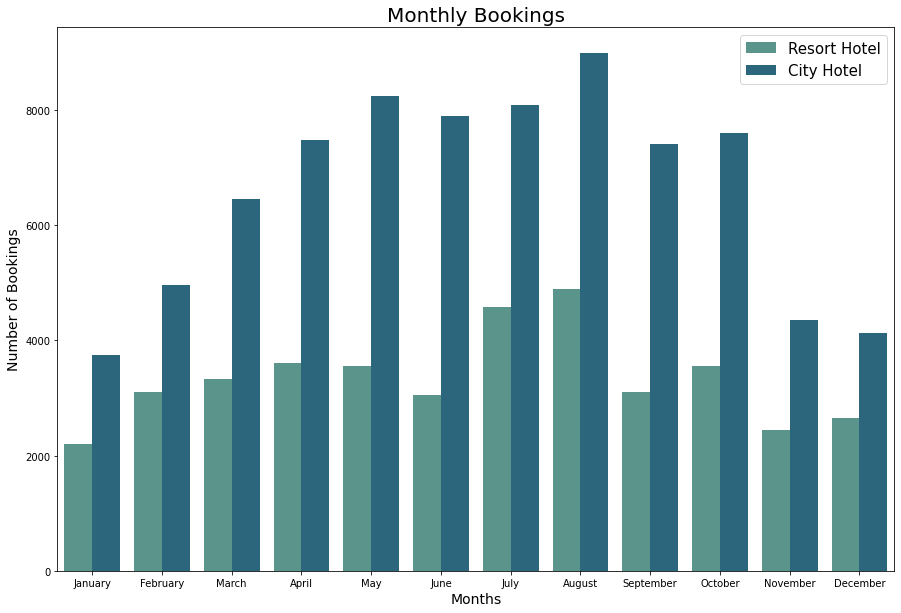

In [68]:
plt.figure(figsize = (15, 10))
sns.countplot(x=df['arrival_date_month'], hue=df['hotel'], order=['January', 'February', 'March', 'April', 'May', 'June', 'July',
          'August', 'September', 'October', 'November', 'December'],palette='crest').set_title ('Monthly Bookings',fontsize=20)
plt.xlabel('Months', fontsize=14)
plt.ylabel('Number of Bookings', fontsize=14)
plt.legend(prop={'size':15})

Conclusion = In above we see that, Most of booking in Month of August in City Hotel, Resort Hotel

# Plot of monthly canceled

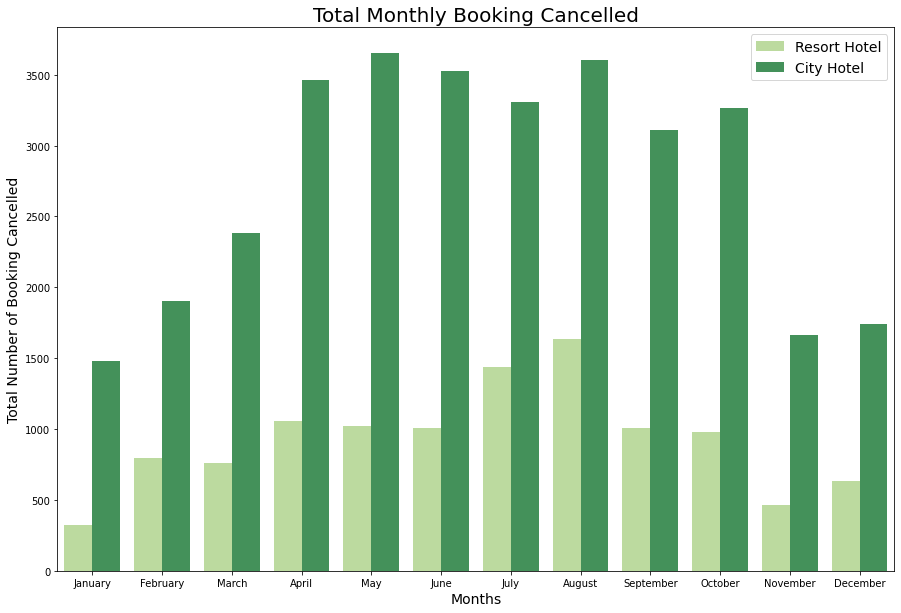

In [75]:
#Countplot of Total number of booking Cancelled month wise 
df1=df[df['is_canceled']==1]
plt.figure(figsize = (15, 10))
sns.countplot(x=df1['arrival_date_month'], hue=df1['hotel'], order=['January', 'February', 'March', 'April', 'May', 'June', 'July',
          'August', 'September', 'October', 'November', 'December'],palette='YlGn').set_title ('Total Monthly Booking Cancelled',fontsize=20)
plt.xlabel('Months',fontsize=14)
plt.ylabel('Total Number of Booking Cancelled',fontsize=14)
plt.legend(prop={'size':14})

Conclusion = In May, Most of booking cancel in City Hotel and Resort Hotel

# Plot total Non-cancel booking

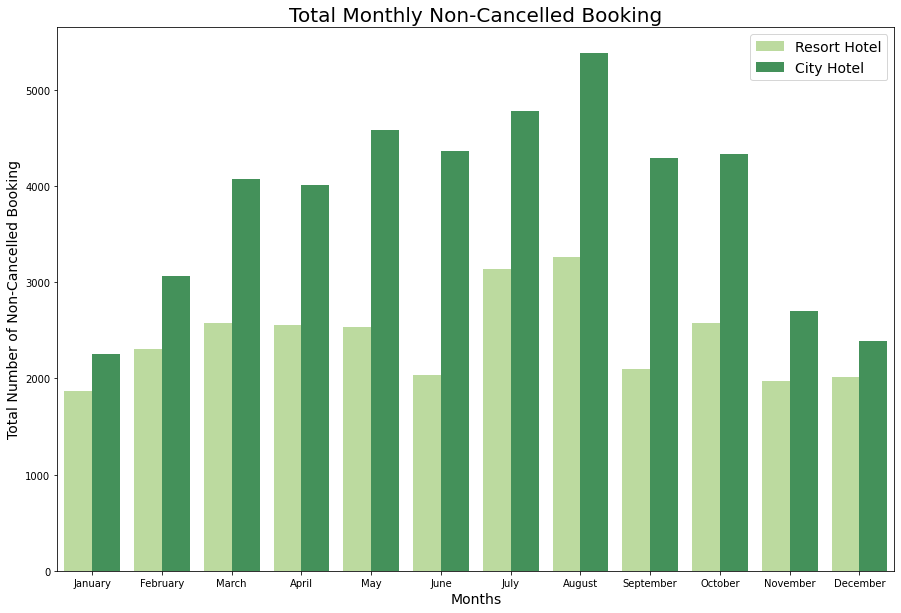

In [83]:
#Countplot for Monthly Non-Cancelled Booking
df2=df[df['is_canceled']==0]
plt.figure(figsize = (15, 10))
sns.countplot(x=df2['arrival_date_month'], hue=df2['hotel'], order=['January', 'February', 'March', 'April', 'May', 'June', 'July',
          'August', 'September', 'October', 'November', 'December'],palette='YlGn').set_title ('Total Monthly Non-Cancelled Booking',fontsize=20)
plt.xlabel('Months',fontsize=14)
plt.ylabel('Total Number of Non-Cancelled Booking',fontsize=14)
plt.legend(prop={'size':14})